# Simple Linear Regression with Gradient Descent and Scikit-learn

In this notebook , I predicted End Semester Examination performance by using two methods. 
1. Gradient Descent (Without Scikit-learn)
2. using Scikit-learn

## 1.Gradient Descent

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Loading data

In [2]:
data = pd.read_csv('../input/predictingese/AttendanceMarksSA.csv')
data.head()


,Attendance,MSE,ESE
0,70,10,42
1,92,7,39
2,67,3,32
3,82,16,50
4,80,9,44


### Ploting data

By visualizing data , we can get idea about dataset.

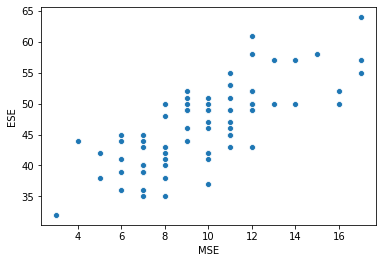

In [3]:
X= data['MSE']
Y=data['ESE']
sns.scatterplot(X,Y)

### Gradient Descent

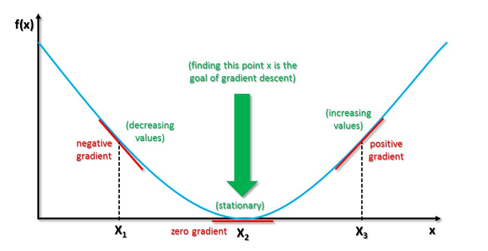

Here is formula for **gradient descent**.

In gradient descent we are updating parameters ***theta0*** and ***theta1*** until **Convergence**

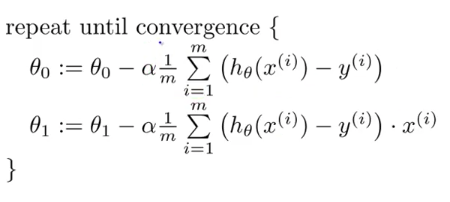

### Initializing parameters and hyper-parameters

**Parameters** - theta0 , theta1

**Hyper-parameters** - alpha , count

In [4]:
theta0 = 0
theta1 = 0
alpha = 0.01
count = 10000
m = len(X) # m is number of examples i.e number of students here.

### Implementing Gradient Descent

In [5]:
for i in range(count): 
    Y_hat = theta1*X + theta0  
    theta0 = theta0 - (alpha/m)*sum(Y_hat-Y)
    theta1 = theta1 - (alpha/m)*sum(X*(Y_hat-Y))
    
    
print(theta0,theta1)

30.66113097444092 1.6326392534114609


### Ploting regression line

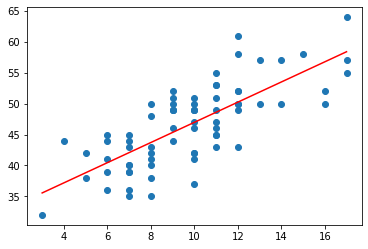

In [6]:
Y_hat = theta1*X + theta0

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_hat), max(Y_hat)], color='red')  # regression line
plt.show()

### Calculating Residual Standard Error

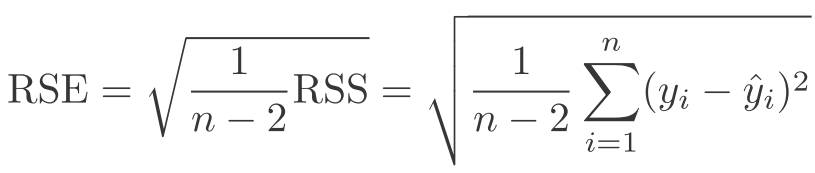

In [7]:
import math
def RSE(y_true, y_predicted):
   
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse


rse= RSE(data['ESE'],Y_hat)
print(rse)

4.3962248281750655


## 2. Using Scikit-Learn

### Importing Library

In [8]:

from sklearn.linear_model import LinearRegression

### Implementation

In [9]:
X = np.array(data['MSE']).reshape(-1,1)
y = np.array(data['ESE']).reshape(-1,1)
 

model = LinearRegression()
model.fit(X,y)


print(model.coef_)
print(model.intercept_)

y_predict = model.predict(X)



[[1.63215164]]
[30.66635246]


### Calculating Residual Standard Error

In [10]:
rse = RSE(y,y_predict)

print(rse)

4.396224549647787


### Predicting score

In [11]:
marks = [17]
result = model.predict([marks])

In [12]:
print(result)

[[58.41293033]]


If my marks are 17 in Mid Semester Examination my score for End Semester Examination would be 58